<a href="https://colab.research.google.com/github/snehdeswal1105/ML_framingham_heart/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
count    4240.000000
mean       49.580189
std         8.572942
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64


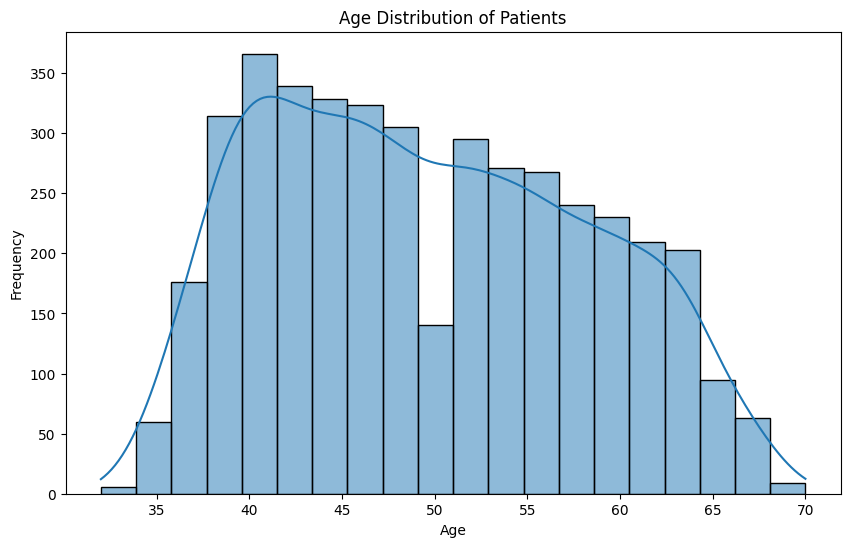

age_group
(20, 30]       0
(30, 40]     748
(40, 50]    1609
(50, 60]    1304
(60, 70]     579
(70, 80]       0
Name: count, dtype: int64


In [ ]:
#What is the age distribution of patients?
#1.Load the dataset:
import pandas as pd
path='/framingham.csv'
df = pd.read_csv('/framingham.csv')
#Check if 'age' column exists:
print(df.columns)
#Inspect age values:
print(df['age'].describe())  # gives count, mean, std, min, 25%, 50%, 75%, max
#Plot a histogram or distribution:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#Group ages into bins
age_bins = [20, 30, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

print(df['age_group'].value_counts().sort_index())

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'age_group'],
      dtype='object')
male
0    2420
1    1820
Name: count, dtype: int64
Counts:
 male
0    2420
1    1820
Name: count, dtype: int64

Percentages:
 male
0    57.075472
1    42.924528
Name: proportion, dtype: float64


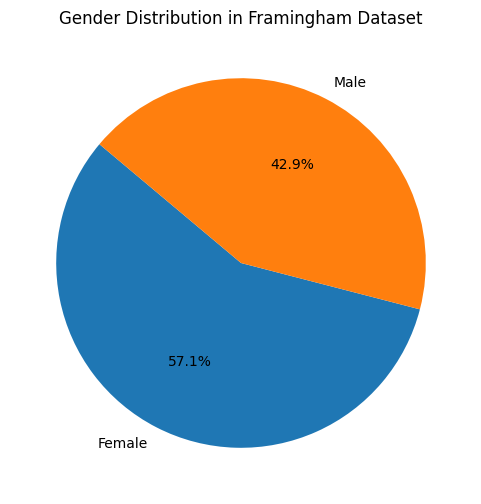

In [ ]:
#Is there a gender imbalance in the dataset?
#Check the gender column name:
print(df.columns)
#It's often named 'male', where:
#1 = male
#0 = female
#Count gender values:
print(df['male'].value_counts())
#This will show how many males and females are in the dataset.
#Calculate percentage:
gender_counts = df['male'].value_counts()
gender_percent = df['male'].value_counts(normalize=True) * 100

print("Counts:\n", gender_counts)
print("\nPercentages:\n", gender_percent)
#Optional visualization:
import matplotlib.pyplot as plt

labels = ['Female', 'Male']
sizes = gender_counts.sort_index()  # 0 first (Female), then 1 (Male)

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution in Framingham Dataset')
plt.show()

age_group
20–29          NaN
30–39     5.080214
40–49    10.876321
50–59    20.398773
60–69    28.497409
70–79          NaN
Name: TenYearCHD, dtype: float64


<ipython-input-11-22cca91b71e6>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prevalence_by_age = df.groupby('age_group')['TenYearCHD'].mean() * 100
<ipython-input-11-22cca91b71e6>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prevalence_by_age.index, y=prevalence_by_age.values, palette="rocket")


ValueError: Axis limits cannot be NaN or Inf

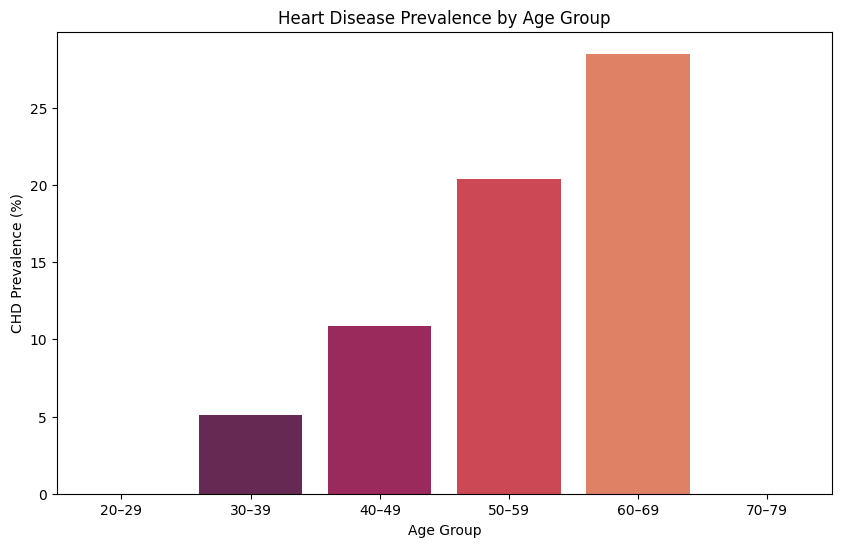

In [ ]:
#How does heart disease prevalence vary by age group?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/framingham.csv')

# Define age groups (adjust ranges as needed)
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20–29', '30–39', '40–49', '50–59', '60–69', '70–79']

# Create a new column for age group
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

# Calculate prevalence (percentage with CHD) per age group
prevalence_by_age = df.groupby('age_group')['TenYearCHD'].mean() * 100

# Display the result
print(prevalence_by_age)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=prevalence_by_age.index, y=prevalence_by_age.values, palette="rocket")
plt.title('Heart Disease Prevalence by Age Group')
plt.ylabel('CHD Prevalence (%)')
plt.xlabel('Age Group')
plt.ylim(0, max(prevalence_by_age.values) + 5)
plt.show()


<ipython-input-12-2b3a9cb1f117>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette='Set2')


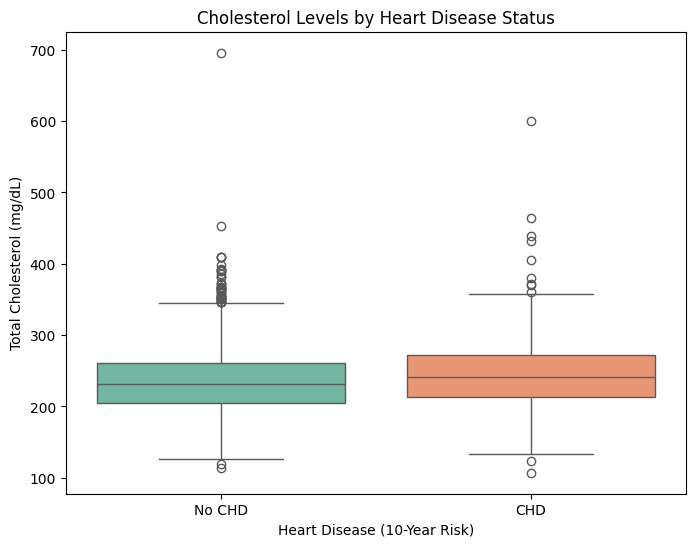

TenYearCHD
0    235.147398
1    245.388976
Name: totChol, dtype: float64
             totChol  TenYearCHD
totChol     1.000000    0.082369
TenYearCHD  0.082369    1.000000


In [ ]:
#Is there a relationship between cholesterol levels and heart disease?

#Compare Cholesterol Levels by Heart Disease Status
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/framingham.csv')

# Drop rows with missing cholesterol or CHD values
df = df.dropna(subset=['totChol', 'TenYearCHD'])

# Boxplot comparison
plt.figure(figsize=(8,6))
sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette='Set2')
plt.xticks([0, 1], ['No CHD', 'CHD'])
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (10-Year Risk)')
plt.ylabel('Total Cholesterol (mg/dL)')
plt.show()
#Check Mean Cholesterol Levels
print(df.groupby('TenYearCHD')['totChol'].mean())
#Optional: Correlation Check
print(df[['totChol', 'TenYearCHD']].corr())

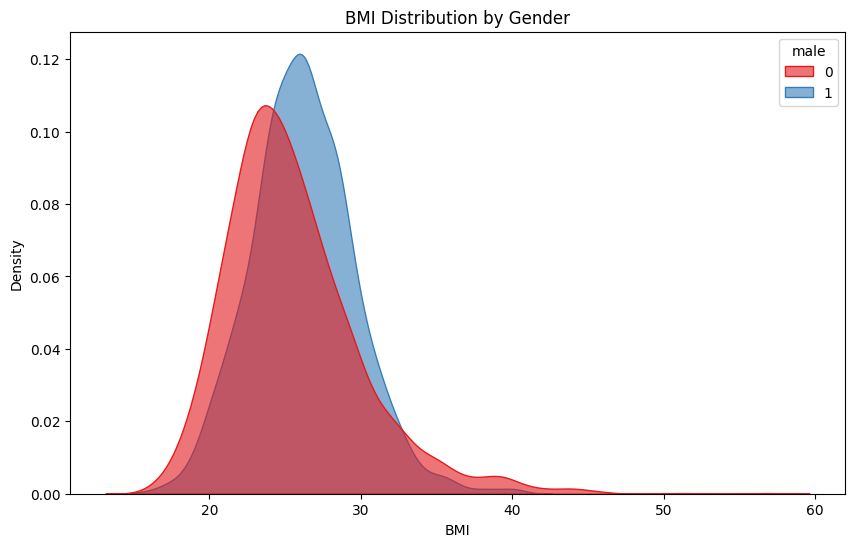

       count       mean       std    min      25%     50%     75%    max
male                                                                    
0     2406.0  25.510723  4.495249  15.96  22.5325  24.745  27.705  56.80
1     1815.0  26.185333  3.416430  15.54  23.9600  26.080  28.345  40.38


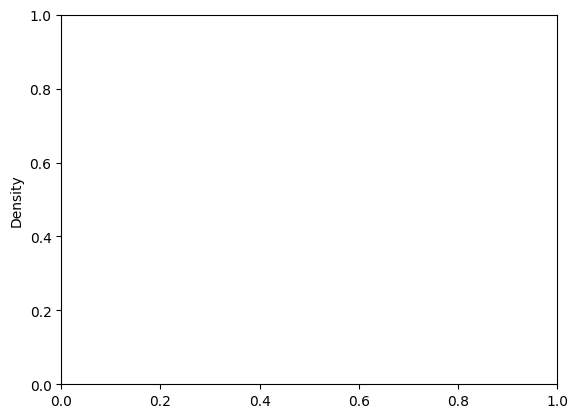

       count       mean       std    min      25%     50%     75%    max
male                                                                    
0     2406.0  25.510723  4.495249  15.96  22.5325  24.745  27.705  56.80
1     1815.0  26.185333  3.416430  15.54  23.9600  26.080  28.345  40.38


In [ ]:
#5.What is the distribution of BMI across genders?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# load data set
df = pd.read_csv('/framingham.csv')
#drop missing BMI or gender values
df = df.dropna(subset=['BMI', 'male'])
#5.What is the distribution of BMI across genders?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# load data set
df = pd.read_csv('/framingham.csv')
#drop missing BMI or gender values
df = df.dropna(subset=['BMI', 'male'])
#plot BMI distribution by gender
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='BMI', hue='male', fill=True, common_norm=False, palette='Set1', alpha=0.6)
plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()
#compare mean and median
print(df.groupby('male')['BMI'].describe())
plt.ylabel('Density')
plt.show()
#compare mean and median
print(df.groupby('male')['BMI'].describe())


CHD Rates (%):
Non-Smokers    14.498834
Smokers        15.894988
Name: TenYearCHD, dtype: float64


<ipython-input-22-0e6ec8c2c505>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chd_rates.index, y=chd_rates.values, palette='Set2')


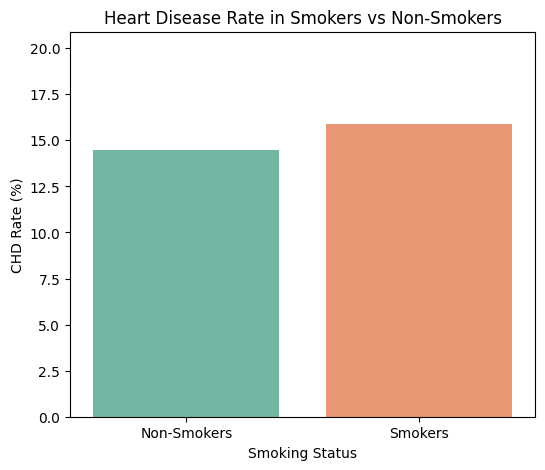

In [ ]:
#Do smokers have higher heart disease rates than non-smokers?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/framingham.csv')

# Drop missing values in relevant columns
df = df.dropna(subset=['currentSmoker', 'TenYearCHD'])

# Calculate CHD prevalence in smokers vs non-smokers
chd_rates = df.groupby('currentSmoker')['TenYearCHD'].mean() * 100
chd_rates.index = ['Non-Smokers', 'Smokers']

# Display
print("CHD Rates (%):")
print(chd_rates)

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x=chd_rates.index, y=chd_rates.values, palette='Set2')
plt.title('Heart Disease Rate in Smokers vs Non-Smokers')
plt.ylabel('CHD Rate (%)')
plt.xlabel('Smoking Status')
plt.ylim(0, max(chd_rates.values) + 5)
plt.show()


<ipython-input-23-4c70d159817e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='sysBP', data=df, palette='coolwarm')


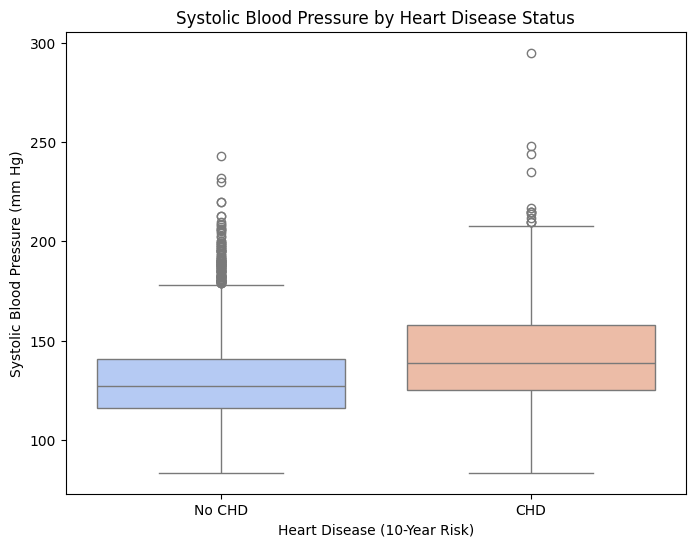

             count        mean        std   min    25%    50%    75%    max
TenYearCHD                                                                 
0           3596.0  130.337319  20.450363  83.5  116.0  127.0  141.0  243.0
1            644.0  143.618789  26.690282  83.5  125.0  139.0  158.0  295.0
T-statistic: -12.01, p-value: 0.0000


In [ ]:
#How does systolic blood pressure differ between patients with and without heart disease?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/framingham.csv')

# Drop rows with missing values
df = df.dropna(subset=['sysBP', 'TenYearCHD'])

# Boxplot comparison
plt.figure(figsize=(8,6))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, palette='coolwarm')
plt.xticks([0, 1], ['No CHD', 'CHD'])
plt.title('Systolic Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease (10-Year Risk)')
plt.ylabel('Systolic Blood Pressure (mm Hg)')
plt.show()
#To compare average systolic BP:
print(df.groupby('TenYearCHD')['sysBP'].describe())
#apply t-test
from scipy.stats import ttest_ind

no_chd = df[df['TenYearCHD'] == 0]['sysBP']
chd = df[df['TenYearCHD'] == 1]['sysBP']

t_stat, p_val = ttest_ind(no_chd, chd, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")


CHD Prevalence (%):
Non-Diabetic    14.621157
Diabetic        36.697248
Name: TenYearCHD, dtype: float64


<ipython-input-24-4129963433eb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chd_by_diabetes.index, y=chd_by_diabetes.values, palette='pastel')


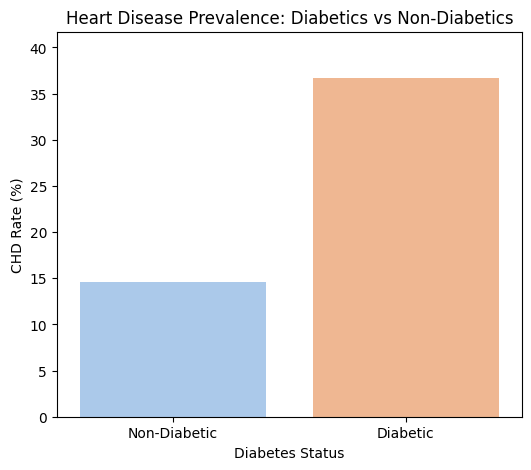

Chi-squared Test
----------------
Chi2 Statistic: 38.48
p-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[3503.55566038  627.44433962]
 [  92.44433962   16.55566038]]
Optimization terminated successfully.
         Current function value: 0.422283
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4238
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 May 2025   Pseudo R-squ.:                0.008651
Time:                        19:10:52   Log-Likelihood:                -1790.5
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 2.268e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
-------

In [ ]:
#Are diabetics more likely to have heart disease?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/framingham.csv')

# Drop missing values
df = df.dropna(subset=['diabetes', 'TenYearCHD'])

# Calculate CHD prevalence in diabetics vs non-diabetics
chd_by_diabetes = df.groupby('diabetes')['TenYearCHD'].mean() * 100
chd_by_diabetes.index = ['Non-Diabetic', 'Diabetic']

# Display values
print("CHD Prevalence (%):")
print(chd_by_diabetes)

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x=chd_by_diabetes.index, y=chd_by_diabetes.values, palette='pastel')
plt.title('Heart Disease Prevalence: Diabetics vs Non-Diabetics')
plt.ylabel('CHD Rate (%)')
plt.xlabel('Diabetes Status')
plt.ylim(0, max(chd_by_diabetes.values) + 5)
plt.show()

#chi-squared test
import pandas as pd
from scipy.stats import chi2_contingency

# Load data
df = pd.read_csv('/framingham.csv')

# Drop missing values in relevant columns
df = df.dropna(subset=['diabetes', 'TenYearCHD'])

# Create a contingency table
contingency = pd.crosstab(df['diabetes'], df['TenYearCHD'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

# Results
print("Chi-squared Test")
print("----------------")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)
#logistic regression
import statsmodels.api as sm

# Define X and y
X = df[['diabetes']]  # Predictor: diabetes
X = sm.add_constant(X)  # Adds intercept term
y = df['TenYearCHD']    # Target: CHD (1 or 0)

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Display results
print(model.summary())


Correlation Matrix:
               age  diabetes     sysBP
age       1.000000  0.101314  0.394053
diabetes  0.101314  1.000000  0.111265
sysBP     0.394053  0.111265  1.000000


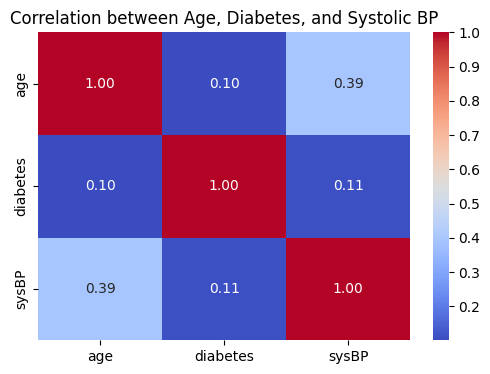

In [ ]:
#Is there a correlation between age, diabetes and systolic blood pressure?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/framingham.csv')

# Keep only relevant columns
df_subset = df[['age', 'diabetes', 'sysBP']].dropna()

# Compute correlation matrix
correlation_matrix = df_subset.corr()

# Display correlation values
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Age, Diabetes, and Systolic BP')
plt.show()


In [ ]:
#Does physical activity correlate with lower heart disease rates?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/framingham.csv')

# Check for column name (update if needed)
print(df.columns)  # Look for 'physActivity' or similar

if 'physActivity' in df.columns:
    df = df.dropna(subset=['physActivity', 'TenYearCHD'])

    # Group by physical activity and calculate CHD rate
    chd_by_activity = df.groupby('physActivity')['TenYearCHD'].mean() * 100
    chd_by_activity.index = ['Inactive', 'Active']

    # Print rates
    print("CHD Rates by Physical Activity:")
    print(chd_by_activity)

    # Plot
    plt.figure(figsize=(8,6))
    sns.barplot(x=chd_by_activity.index, y=chd_by_activity.values, palette='crest')
    plt.title('Heart Disease Rate by Physical Activity')
    plt.ylabel('CHD Rate (%)')
    plt.xlabel('Physical Activity Status')
    plt.ylim(0, max(chd_by_activity.values) + 5)
    plt.show()




Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
#chi-squared test
import pandas as pd
from scipy.stats import chi2_contingency

# Load dataset
df = pd.read_csv('/framingham.csv')

# Check column name (assume it's 'physActivity'; update if needed)
if 'physActivity' in df.columns:
    # Drop rows with missing values
    df = df.dropna(subset=['physActivity', 'TenYearCHD'])

    # Create contingency table
    contingency = pd.crosstab(df['physActivity'], df['TenYearCHD'])

    # Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency)

    # Print results
    print("Chi-squared Test for Physical Activity and Heart Disease")
    print("--------------------------------------------------------")
    print(f"Chi2 Statistic: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("\nContingency Table:")
    print(contingency)
    print("\nExpected Frequencies:")
    print(expected)

else:
    print("Column 'physActivity' not found in the dataset.")

Column 'physActivity' not found in the dataset.


Correlation Matrix:
              BMI   totChol   glucose
BMI      1.000000  0.113516  0.087658
totChol  0.113516  1.000000  0.046667
glucose  0.087658  0.046667  1.000000


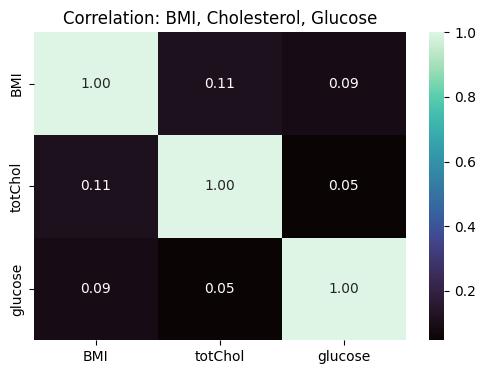

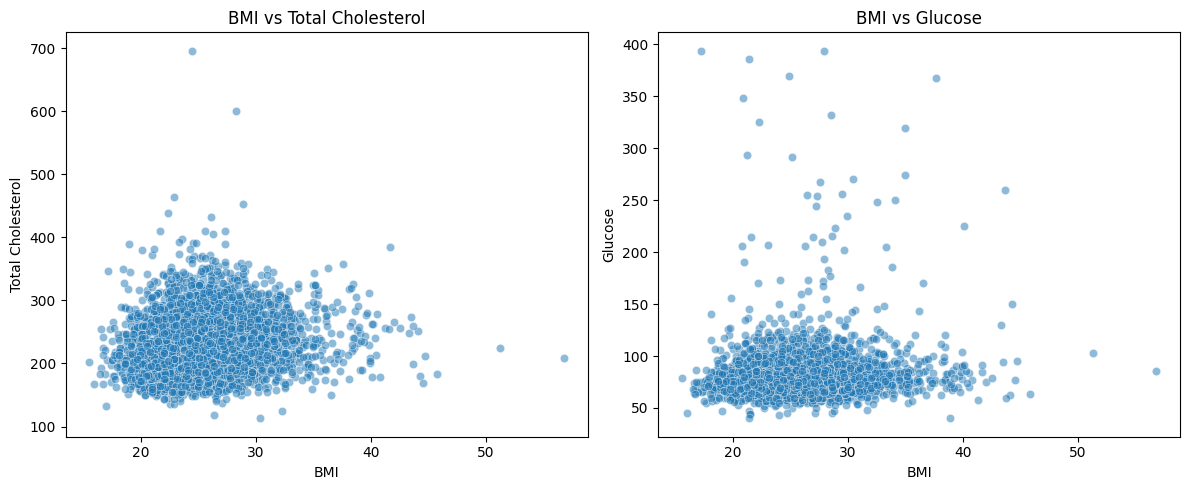

In [ ]:
#How does BMI relate to cholesterol and glucose levels?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/framingham.csv')

# Keep relevant columns and drop missing values
df_subset = df[['BMI', 'totChol', 'glucose']].dropna()

# Compute correlation matrix
correlation_matrix = df_subset.corr()

# Print correlation values
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation: BMI, Cholesterol, Glucose')
plt.show()

# Optional: Scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='BMI', y='totChol', data=df_subset, alpha=0.5)
plt.title('BMI vs Total Cholesterol')
plt.xlabel('BMI')
plt.ylabel('Total Cholesterol')

plt.subplot(1, 2, 2)
sns.scatterplot(x='BMI', y='glucose', data=df_subset, alpha=0.5)
plt.title('BMI vs Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')

plt.tight_layout()
plt.show()


In [ ]:
#Are individuals with heart disease more likely to be on BP medication?
import pandas as pd
from scipy.stats import chi2_contingency

# Load data
df = pd.read_csv('/framingham.csv')

# Drop missing values in relevant columns
df = df.dropna(subset=['BPMeds', 'TenYearCHD'])

# Create contingency table
contingency = pd.crosstab(df['TenYearCHD'], df['BPMeds'])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

# Print results
print("Chi-squared Test: Heart Disease vs BP Medication")
print("------------------------------------------------")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nContingency Table (Heart Disease vs BP Meds):")
print(contingency)
print("\nExpected Frequencies:")
print(expected)


Chi-squared Test: Heart Disease vs BP Medication
------------------------------------------------
Chi2 Statistic: 30.65
p-value: 0.0000
Degrees of Freedom: 1

Contingency Table (Heart Disease vs BP Meds):
BPMeds       0.0  1.0
TenYearCHD           
0           3471   83
1            592   41

Expected Frequencies:
[[3448.74659661  105.25340339]
 [ 614.25340339   18.74659661]]


Heart Disease Rate by BMI Outlier Status:
BMI_outlier
Normal BMI     14.815713
BMI Outlier    23.711340
Name: TenYearCHD, dtype: float64

Heart Disease Rate by Blood Pressure Outlier Status:
BP_outlier
Normal BP     14.303149
BP Outlier    38.709677
Name: TenYearCHD, dtype: float64


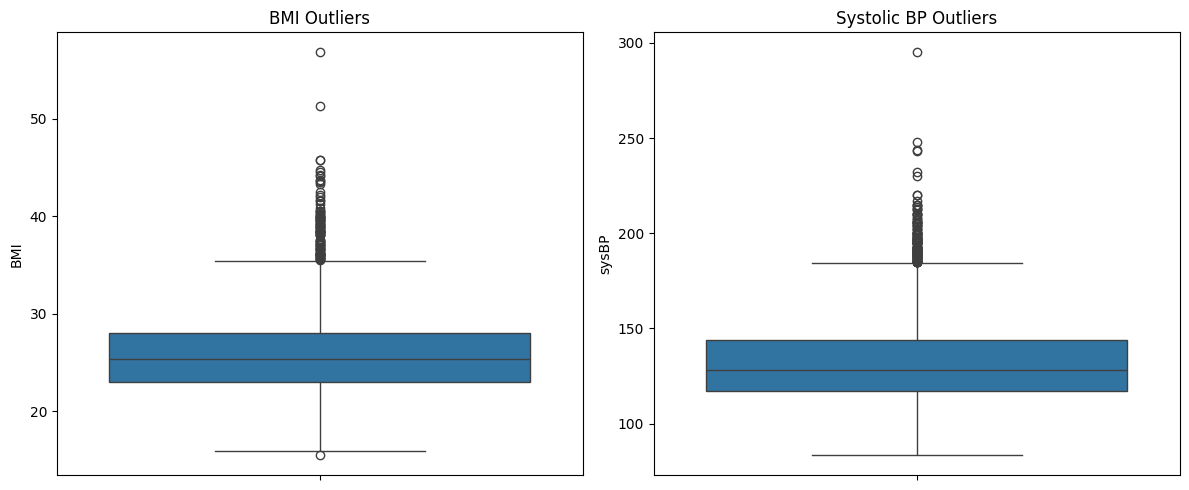

Optimization terminated successfully.
         Current function value: 0.417825
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4221
Model:                          Logit   Df Residuals:                     4218
Method:                           MLE   Df Model:                            2
Date:                Sat, 10 May 2025   Pseudo R-squ.:                 0.01237
Time:                        19:45:27   Log-Likelihood:                -1763.6
converged:                       True   LL-Null:                       -1785.7
Covariance Type:            nonrobust   LLR p-value:                 2.556e-10
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.7965      0.045    -39.913      0.000      -1.885      -1.708
BMI_outlier     0.2971    

In [ ]:
#are there outliers in blood pressure or BMI, and are they associated with disease?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/framingham.csv')

# Keep relevant columns and drop missing
df = df.dropna(subset=['BMI', 'sysBP', 'TenYearCHD'])

# Function to flag outliers using IQR method
def find_outliers_IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Detect outliers
df['BMI_outlier'] = find_outliers_IQR(df['BMI'])
df['BP_outlier'] = find_outliers_IQR(df['sysBP'])

# Compare CHD rate for outliers vs normal
bmi_chd_rate = df.groupby('BMI_outlier')['TenYearCHD'].mean() * 100
bp_chd_rate = df.groupby('BP_outlier')['TenYearCHD'].mean() * 100

print("Heart Disease Rate by BMI Outlier Status:")
print(bmi_chd_rate.rename(index={False: 'Normal BMI', True: 'BMI Outlier'}))
print("\nHeart Disease Rate by Blood Pressure Outlier Status:")
print(bp_chd_rate.rename(index={False: 'Normal BP', True: 'BP Outlier'}))
#boxplot
# Boxplots to visualize outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='BMI', data=df)
plt.title('BMI Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y='sysBP', data=df)
plt.title('Systolic BP Outliers')

plt.tight_layout()
plt.show()
#logistic regression
# Add outlier columns
df['BMI_outlier'] = find_outliers_IQR(df['BMI']).astype(int)
df['BP_outlier'] = find_outliers_IQR(df['sysBP']).astype(int)

# Define features and target
X = df[['BMI_outlier', 'BP_outlier']]  # predictors
X = sm.add_constant(X)                 # add intercept
y = df['TenYearCHD']                   # target

# Fit logistic regression
model = sm.Logit(y, X).fit()

# Show summary
print(model.summary())

# Calculate odds ratios
odds_ratios = np.exp(model.params)
print("\nOdds Ratios:")
print(odds_ratios)


<ipython-input-42-8ec676c75b3e>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chd_by_smoking = df.groupby('smoking_level')['TenYearCHD'].mean() * 100
<ipython-input-42-8ec676c75b3e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chd_by_smoking.index, y=chd_by_smoking.values, palette='flare')


Heart Disease Rate by Smoking Level:
smoking_level
Non-smoker          14.498834
Light (1–5)         10.793651
Moderate (6–10)     12.420382
Heavy (11–20)       16.479017
Very Heavy (>20)    21.132898
Name: TenYearCHD, dtype: float64


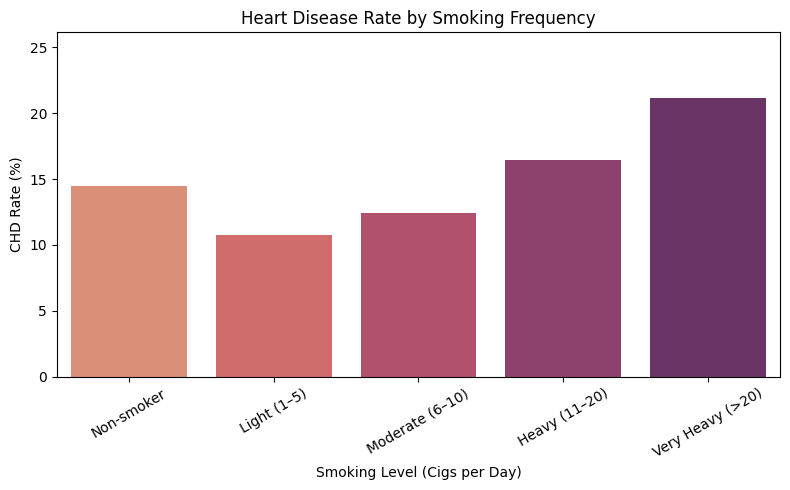

Optimization terminated successfully.
         Current function value: 0.425349
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4211
Model:                          Logit   Df Residuals:                     4209
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 May 2025   Pseudo R-squ.:                0.003747
Time:                        19:50:02   Log-Likelihood:                -1791.1
converged:                       True   LL-Null:                       -1797.9
Covariance Type:            nonrobust   LLR p-value:                 0.0002421
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8378      0.055    -33.197      0.000      -1.946      -1.729
cigsPerDay     0.0127      0.

In [ ]:
#How does heart disease risk vary by smoking frequency (packs per year)?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/framingham.csv')

# Drop missing data
df = df.dropna(subset=['cigsPerDay', 'TenYearCHD'])

# Define smoking level bins (approx. packs per day)
df['smoking_level'] = pd.cut(df['cigsPerDay'],
                             bins=[-1, 0, 5, 10, 20, 60],
                             labels=['Non-smoker', 'Light (1–5)', 'Moderate (6–10)', 'Heavy (11–20)', 'Very Heavy (>20)'])

# Group by smoking level and calculate CHD rate
chd_by_smoking = df.groupby('smoking_level')['TenYearCHD'].mean() * 100

# Print result
print("Heart Disease Rate by Smoking Level:")
print(chd_by_smoking)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=chd_by_smoking.index, y=chd_by_smoking.values, palette='flare')
plt.title('Heart Disease Rate by Smoking Frequency')
plt.ylabel('CHD Rate (%)')
plt.xlabel('Smoking Level (Cigs per Day)')
plt.xticks(rotation=30)
plt.ylim(0, max(chd_by_smoking.values) + 5)
plt.tight_layout()
plt.show()
#logistic regression
# Define predictor and outcome
X = df[['cigsPerDay']]  # smoking frequency
X = sm.add_constant(X)  # add intercept
y = df['TenYearCHD']    # heart disease indicator

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Print model summary
print(model.summary())

# Calculate and display odds ratio
odds_ratios = np.exp(model.params)
print("\nOdds Ratios:")
print(odds_ratios)

In [ ]:
#What’s the heart disease rate among people under 40 vs. over 60?
import pandas as pd

# Load data
df = pd.read_csv('/framingham.csv')

# Drop missing values
df = df.dropna(subset=['age', 'TenYearCHD'])

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 39, 60, 100], labels=['Under 40', '40–60', 'Over 60'])

# Calculate heart disease rate for under 40 and over 60
chd_by_age = df[df['age_group'].isin(['Under 40', 'Over 60'])].groupby('age_group')['TenYearCHD'].mean() * 100

# Print results
print("Heart Disease Rate by Age Group:")
print(chd_by_age)


Heart Disease Rate by Age Group:
age_group
Under 40     4.136691
40–60             NaN
Over 60     28.497409
Name: TenYearCHD, dtype: float64


<ipython-input-43-bfe96d4f17fb>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chd_by_age = df[df['age_group'].isin(['Under 40', 'Over 60'])].groupby('age_group')['TenYearCHD'].mean() * 100


In [ ]:
#Do people with a family history of heart disease have higher risk?
import pandas as pd
from scipy.stats import chi2_contingency

# Load data
df = pd.read_csv('/framingham.csv')

# Assume 'prevalentHyp' (hypertension) is a proxy for family history — replace with real column if different
# Drop missing values
df = df.dropna(subset=['prevalentHyp', 'TenYearCHD'])

# Create contingency table
contingency = pd.crosstab(df['prevalentHyp'], df['TenYearCHD'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

# Calculate heart disease rate for each group
chd_rates = df.groupby('prevalentHyp')['TenYearCHD'].mean() * 100

# Print results
print("Heart Disease Rate by Family History (proxy: prevalentHyp):")
print(chd_rates.rename(index={0: 'No Family History', 1: 'Family History'}))

print("\nChi-squared Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")


Heart Disease Rate by Family History (proxy: prevalentHyp):
prevalentHyp
No Family History    10.913445
Family History       24.677297
Name: TenYearCHD, dtype: float64

Chi-squared Test Results:
Chi2 Statistic: 132.46
p-value: 0.0000


In [ ]:
#Are there interactions between smoking and cholesterol in predicting disease?
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load data
df = pd.read_csv('/framingham.csv')

# Drop missing values
df = df.dropna(subset=['cigsPerDay', 'totChol', 'TenYearCHD'])

# Create interaction term
df['cigs_x_chol'] = df['cigsPerDay'] * df['totChol']

# Define predictors and outcome
X = df[['cigsPerDay', 'totChol', 'cigs_x_chol']]
X = sm.add_constant(X)  # Add intercept
y = df['TenYearCHD']

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Summary
print(model.summary())

# Odds ratios
odds_ratios = np.exp(model.params)
print("\nOdds Ratios:")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.421167
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4161
Model:                          Logit   Df Residuals:                     4157
Method:                           MLE   Df Model:                            3
Date:                Sat, 10 May 2025   Pseudo R-squ.:                 0.01223
Time:                        20:01:13   Log-Likelihood:                -1752.5
converged:                       True   LL-Null:                       -1774.2
Covariance Type:            nonrobust   LLR p-value:                 2.036e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1483      0.299    -10.544      0.000      -3.734      -2.563
cigsPerDay      0.0225    

In [ ]:
#What’s the prevalence of pre-hypertension and how does it relate to future disease?
import pandas as pd

# Load data
df = pd.read_csv('/framingham.csv')

# Drop rows with missing values in BP and CHD columns
df = df.dropna(subset=['sysBP', 'diaBP', 'TenYearCHD'])

# Define pre-hypertension based on BP criteria
df['prehypertension'] = ((df['sysBP'] >= 120) & (df['sysBP'] < 140)) | ((df['diaBP'] >= 80) & (df['diaBP'] < 90))

# Calculate prevalence of pre-hypertension
prehypertension_prevalence = df['prehypertension'].mean() * 100
print(f"Prevalence of Pre-hypertension: {prehypertension_prevalence:.2f}%")

# Calculate heart disease rates for pre-hypertension vs others
chd_by_prehypertension = df.groupby('prehypertension')['TenYearCHD'].mean() * 100
print("\nHeart Disease Rate by Pre-hypertension Status:")
print(chd_by_prehypertension.rename(index={False: 'Normal/Hypertensive BP', True: 'Pre-hypertension'}))

Prevalence of Pre-hypertension: 53.70%

Heart Disease Rate by Pre-hypertension Status:
prehypertension
Normal/Hypertensive BP    17.116658
Pre-hypertension          13.526570
Name: TenYearCHD, dtype: float64


Heart Disease Incidence by Risk Score:
risk_score
0     8.415842
1    11.608624
2    18.961788
3    27.692308
Name: TenYearCHD, dtype: float64


<ipython-input-54-db3859e4faf0>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chd_by_risk_score.index, y=chd_by_risk_score.values, palette='coolwarm')


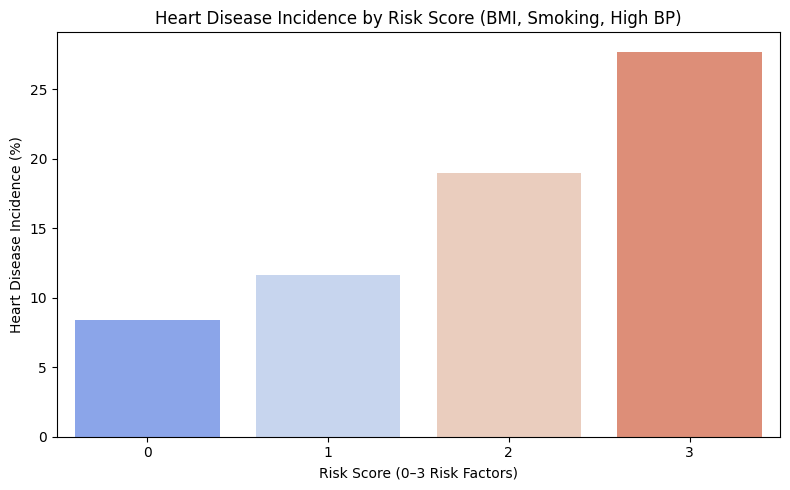

Chi-squared Test Results:
Chi2 Statistic: 102.82
p-value: 0.0000
Optimization terminated successfully.
         Current function value: 0.408435
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4192
Model:                          Logit   Df Residuals:                     4188
Method:                           MLE   Df Model:                            3
Date:                Sat, 10 May 2025   Pseudo R-squ.:                 0.03678
Time:                        20:16:52   Log-Likelihood:                -1712.2
converged:                       True   LL-Null:                       -1777.5
Covariance Type:            nonrobust   LLR p-value:                 3.711e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3809      0.096    -24.888

In [ ]:
#Do patients with multiple risk factors (e.g., high BMI, smoking, high BP) have higher disease incidence?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/framingham.csv')

# Drop missing values
df = df.dropna(subset=['BMI', 'cigsPerDay', 'sysBP', 'diaBP', 'TenYearCHD'])

# Define risk factors
df['high_BMI'] = (df['BMI'] > 25).astype(int)   # High BMI (overweight/obese)
df['smoking'] = (df['cigsPerDay'] > 0).astype(int)  # Smoking (cigs per day > 0)
df['high_BP'] = ((df['sysBP'] > 140) | (df['diaBP'] > 90)).astype(int)  # High BP (Hypertension)

# Create composite risk score (sum of 3 risk factors)
df['risk_score'] = df['high_BMI'] + df['smoking'] + df['high_BP']

# Calculate heart disease incidence by risk score
chd_by_risk_score = df.groupby('risk_score')['TenYearCHD'].mean() * 100

# Print heart disease rates by risk score
print("Heart Disease Incidence by Risk Score:")
print(chd_by_risk_score)

# Visualize the relationship between risk score and heart disease incidence
plt.figure(figsize=(8, 5))
sns.barplot(x=chd_by_risk_score.index, y=chd_by_risk_score.values, palette='coolwarm')
plt.title('Heart Disease Incidence by Risk Score (BMI, Smoking, High BP)')
plt.ylabel('Heart Disease Incidence (%)')
plt.xlabel('Risk Score (0–3 Risk Factors)')
plt.tight_layout()
plt.show()
#chi-squared test
# Create contingency table for Chi-squared test
contingency = pd.crosstab(df['risk_score'], df['TenYearCHD'])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

# Print Chi-squared test results
print("Chi-squared Test Results:")
print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
#logistic regression
# Define predictors and outcome
# Removing 'risk_score' due to perfect collinearity
X = df[['high_BMI', 'smoking', 'high_BP']]
X = sm.add_constant(X)  # Add intercept
y = df['TenYearCHD']    # Target variable: heart disease incidence

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Print model summary
print(model.summary())

# Calculate and display odds ratios
odds_ratios = np.exp(model.params)
print("\nOdds Ratios:")
print(odds_ratios)

